# Artificial and Computational Intelligence Assignment 1

## Problem solving by Informed Search and/or Local Search

### 1.	Define the environment in the following block

1. Performance Measure:  Cost of the optimal path that the robot takes to reach the finish position.
2. Environment: Maze. 
3. Actuator:  Robot's ability to move in four different directions: East, West, North, and South. 
4. Sensor: Robot's vision sensor, which is sensitive to the exposure to sunlight.
### Note- Detailed explanation on PEAS is described in the document file.

### Design the agent as PSA Agent(Problem Solving Agent) Clear Initial data structures to define the graph and variable declarations is expected 

In [1]:
import math
import heapq as heapq

# Directions movement

space_complexity_counters = 0
size_counter = 0 

parentSet = {}

class MazeGrid:
    def __init__(self , gridmap):
        self.x = 6
        self.y = 7
        self.start = (4,1)
        self.finish = (4, 7)
        self.maps = gridmap
        self.directions=[]
        self.directions_costs = {}
        self.hillCost= {}

    def set_start(self, start):
        self.start = start

    def get_start(self):
        return self.start

    def set_finish(self, finish):
        self.finish = finish

    def get_finish(self):
        return self.finish


In [2]:
# Maze state 

maze_dict = {(1, 1): {'E': 1, 'W': 0, 'N': 0, 'S': 1},
  (2, 1): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
  (3, 1): {'E': 0, 'W': 0, 'N': 1, 'S': 0},
  (4, 1): {'E': 1, 'W': 0, 'N': 0, 'S': 1},
  (5, 1): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
  (6, 1): {'E': 1, 'W': 0, 'N': 1, 'S': 0},
  (1, 2): {'E': 1, 'W': 1, 'N': 0, 'S': 1},
  (2, 2): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
  (3, 2): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
  (4, 2): {'E': 0, 'W': 1, 'N': 1, 'S': 0},
  (5, 2): {'E': 1, 'W': 0, 'N': 0, 'S': 0},
  (6, 2): {'E': 1, 'W': 1, 'N': 0, 'S': 0},
  (1, 3): {'E': 0, 'W': 1, 'N': 0, 'S': 1},
  (2, 3): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
  (3, 3): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
  (4, 3): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
  (5, 3): {'E': 1, 'W': 1, 'N': 1, 'S': 0},
  (6, 3): {'E': 1, 'W': 1, 'N': 0, 'S': 0},
  (1, 4): {'E': 1, 'W': 0, 'N': 0, 'S': 1},
  (2, 4): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
  (3, 4): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
  (4, 4): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
  (5, 4): {'E': 0, 'W': 1, 'N': 1, 'S': 0},
  (6, 4): {'E': 1, 'W': 1, 'N': 0, 'S': 0},
  (1, 5): {'E': 0, 'W': 1, 'N': 0, 'S': 1},
  (2, 5): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
  (3, 5): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
  (4, 5): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
  (5, 5): {'E': 1, 'W': 0, 'N': 1, 'S': 0},
  (6, 5): {'E': 1, 'W': 1, 'N': 0, 'S': 0},
  (1, 6): {'E': 1, 'W': 0, 'N': 0, 'S': 1},
  (2, 6): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
  (3, 6): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
  (4, 6): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
  (5, 6): {'E': 0, 'W': 1, 'N': 1, 'S': 0},
  (6, 6): {'E': 1, 'W': 1, 'N': 0, 'S': 0},
  (1, 7): {'E': 0, 'W': 1, 'N': 0, 'S': 1},
  (2, 7): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
  (3, 7): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
  (4, 7): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
  (5, 7): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
  (6, 7): {'E': 0, 'W': 1, 'N': 1, 'S': 0}}


mazegrid = MazeGrid(gridmap=maze_dict)
mazegrid.directions = ['N', 'E', 'S', 'W']

# Movement costs
mazegrid.direction_costs = {'N': 3, 'E': 8, 'S': 3, 'W': 3}

In [3]:
# Find the optimal path using hill climbing algorithm
def find_path(mazegrid1, current,hill_climb_cost):
    
    # global size_counter
    
    global space_complexity_counters
    
    if hill_climb_cost != None:
        nowVal = mazegrid1.get_start()
        start = current
        directionalFinalPath=[mazegrid1.get_finish()]
        if nowVal is start:
            directionalFinalPath.append(nowVal)
        else:
            while nowVal is not start:
                # Space complexity counter calculations
                space_complexity_counters = space_complexity_counters + 1
                val = parentSet[nowVal]
                nowVal=val
                directionalFinalPath.append(nowVal)
        directionalFinalPath = directionalFinalPath[::-1]
        
        return directionalFinalPath
    return None

# IDA*
def find_indices(list_check, value_check):
    """ Function will return only those indices where value is 1, which indicates path in the maze.    """
    return [idx for idx, value in enumerate(list_check) if value == value_check]

def get_next_moves(mazemap,cell):
    """ Function will return next possible moves for a cell in the maze."""
    x,y = cell 
     # Calculation of cell values 
    moves = [(x, y+1), (x, y-1), (x-1, y), (x+1, y)]
    coordinate_val = list(mazemap[cell].values())
    get_ind_1 = find_indices(coordinate_val,1)
    
    # Get the next possible moves from a current cell
    moves = [moves[i] for i in get_ind_1]
    return moves

In [4]:
# Manhattan distance as Heuristic
def manhattan_dis(pos1, pos2):
    x1, y1 = pos1
    x2, y2 = pos2
    return abs(x1 - x2) + abs(y1 - y2)

def goal_position_check(mazegrid3,goal):
    """ Function will return 1 if goal cell is found in maze else will return 0"""
    if goal in mazegrid3.maps:
        return 1
    else :
        return 0

def goal_reach(mazegrid,current):
     if mazegrid.finish in current:
        path.append(mazegrid.finish)
        cost.append(current[mazegrid.finish])
        return 'Success'

### 2.	Definition of Algorithm 1 (Informed Search- Iterative Deepening A* Algorithm)

In [5]:
def ida_algorithm (mazegrid2,mazemap,cell,threshold,g,path):
    
    global space_complexity_counters
    
    """ IDA* algorithm implemented will return Success if optimal path to the given goal is present in maze."""
    
    x,y = cell
    
    # Get the next possible moves from a current cell
    moves = get_next_moves(mazemap,cell)

    # Calculation of g(n) and h(n)
    # f(n) = g(n) + h(n) + 5 + 3 if direction east else
    # f(n) = g(n) + h(n) + 3
    next_g = g+1
    # Space complexity counter calculations
    space_complexity_counters = space_complexity_counters + len(moves)

    f_score_next_cell = [ 8 + manhattan_dis(move,mazegrid2.finish) + next_g if move == (x,y+1) else  3 + manhattan_dis(move,mazegrid2.finish) + next_g  for move in moves]

    # Valid moves : Calculated based on threshold
    # Move is valid if fscore < threshold

    # Space complexity counter calculations
    space_complexity_counters = space_complexity_counters + len(moves)
    
    valid_moves = { move:score for move,score in zip(moves,f_score_next_cell) if score <= threshold }


    # Check if goal state position is same as start
    if mazegrid2.start==mazegrid2.finish:
        return 'Success'

    # Check if given goal state is in the valid set of moves
    test_result = goal_reach(mazegrid2,valid_moves)
    if test_result == 'Success':
        return test_result
    
    # If no valid moves , update threshold with the next minimum value
    if valid_moves == {}:
        if threshold < min(f_score_next_cell):
            threshold = min(f_score_next_cell)
        else:
            threshold = math.inf
        return  threshold

    # Call ida star algorithm again if there are valid moves
    if valid_moves != {}:

            for move in valid_moves:

                path.append(move)
                cost.append(valid_moves[move])

                tmin = ida_algorithm(mazegrid2,mazemap,move,threshold,next_g,path)

                if tmin == 'Success':
                    return 'Success'
                    exit()

                path.pop()
                cost.pop()
            return tmin

### 3.	Definition of Algorithm 2 (Local Search- Hill Climbing Algorithm) 

In [6]:
# Hill Climbing Algorithm for finding Optimal Path with cost
def hill_climbing(mazegrid2):
    
    global space_complexity_counters
    
    if(goal_position_check(mazegrid2,mazegrid2.start) == 1 & goal_position_check(mazegrid2,mazegrid2.finish) == 1):
        hill_climb_heap = [(manhattan_dis(mazegrid2.get_start(), mazegrid2.get_finish()), mazegrid2.start)]
        mazegrid2.hillCost[mazegrid2.get_start()]= manhattan_dis(mazegrid2.get_start(), mazegrid2.get_finish())
        visited = set()
        while hill_climb_heap:
            
            # Space complexity counter calculations
            space_complexity_counters = space_complexity_counters + 1

            (hill_climb_cost, current) = heapq.heappop(hill_climb_heap)
            if current in visited:
                continue

            visited.add(current)

            if current == mazegrid2.finish:
                return hill_climb_cost

            for direction in mazegrid2.directions:
                
                # Space complexity counter calculations
                space_complexity_counters = space_complexity_counters + 1
                
                x, y = current
                if mazegrid2.maps[(x,y)][direction] == 1:
                    if direction == 'N':
                        x -= 1
                    elif direction == 'E':
                        y += 1
                    elif direction == 'S':
                        x += 1
                    elif direction == 'W':
                        y -= 1

                    if (x,y) in mazegrid2.maps:
                        if x > 0 and x <= mazegrid2.x and y > 0 and y <= mazegrid2.y and (x,y) not in visited:
                            next_cell_cost= mazegrid2.direction_costs[direction] + manhattan_dis((x, y), mazegrid2.get_finish())
                            new_cost = hill_climb_cost + next_cell_cost
                            if mazegrid2.hillCost[current] >= next_cell_cost:
                                parentSet[(x, y)] = current
                                mazegrid2.hillCost[(x, y)] = next_cell_cost
                                heapq.heappush(hill_climb_heap, (new_cost, (x, y)))
        return None


### DYNAMIC INPUT

IMPORTANT : Dynamic Input must be got in this section. Display the possible states to choose from:
This is applicable for all the relevent problems as mentioned in the question. 

In [7]:
# maze start and finish positions for the given 6x7 maze configuration
# Valid Inputs between: (1,1) to (6,7)
instart = (4,1)
infinish = (4,7)
if len(instart) < 2 or len(instart) > 2:
    print("Invalid input values.")

if len(infinish) < 2 or len(infinish) > 2:
    print("Invalid input values.")
try:
    (startX,startY) = instart
    (finishX,finishY) = infinish

    if (1 <= startX <= mazegrid.x) & (1 <= startY <= mazegrid.y):
        mazegrid.set_start(instart)
        print("Using starting point :",mazegrid.get_start())
    else:
        print('Error start value must be in range: 1-7. Hence using initial values.',mazegrid.get_start())


    if (1 <= finishX <= mazegrid.x) & (1 <= finishY <= mazegrid.y):
        mazegrid.set_finish(infinish)
        print("Using finishing point :",mazegrid.get_finish())
    else:
        print('Error finish values must be in range: 1-7. Hence using initial values.',mazegrid.get_finish())

except Exception as e:
    print("Invalid input values.",e)

Using starting point : (4, 1)
Using finishing point : (4, 7)


### 4.	Calling the search algorithms

In [8]:
# Calling the IDA* Algorithm for finding Optimal Path with cost
goal_check_res = goal_position_check(mazegrid, mazegrid.finish)
state = True

# Calculate initial threshold for ida* algorithm and initialize the cost and path
threshold = manhattan_dis(mazegrid.start,mazegrid.finish)
cost = [threshold]
path = [mazegrid.start]

if goal_check_res == 1:
    while state:
        
        space_complexity_counters = space_complexity_counters + 1
        
        t = ida_algorithm(mazegrid,mazegrid.maps,mazegrid.start,threshold,0,path)
        if t!= 'Success':
            threshold = t
        if t == 'Success':
            size_counter = size_counter + len(path) # * sys.size(hill_climb_path)
            print(f"size counter {size_counter}")
            print('Goal found!!, optimum path taken with cost for each node in path is:\n',{i:j for i,j in zip(path,cost)})
            print('Total path cost = ',sum(cost))
            state = False
        if t == math.inf:
            print('No solution.')
            state = False
else:
    print('Goal state not in maze, hence no solution.')

size counter 11
Goal found!!, optimum path taken with cost for each node in path is:
 {(4, 1): 6, (5, 1): 11, (6, 1): 13, (6, 2): 18, (6, 3): 18, (6, 4): 18, (6, 5): 18, (6, 6): 18, (6, 7): 18, (5, 7): 13, (4, 7): 13}
Total path cost =  164


In [9]:
# Calling the Hill Climbing Algorithm for finding Optimal Path with cost
hill_climb_cost = hill_climbing(mazegrid)

hill_climb_path = find_path(mazegrid, mazegrid.start,hill_climb_cost);

if hill_climb_path:
    size_counter = size_counter + len(hill_climb_path) # * sys.size(hill_climb_path)

if hill_climb_cost is None:
    print('No path found and hence cost cannot be estimated.')
else:
    print('Goal found!!, Optimal path for Hill Climbing Algorithm: \n',hill_climb_path)
    print('Optimal path found with cost:', hill_climb_cost)


No path found and hence cost cannot be estimated.


### 5.	Comparitive Analysis

In [10]:
#Code Block : Print the Time & Space complexity of algorithm 1 

print(f"Total Space Complexity for IDA* Algorithm : {size_counter}")
print(f"Total Time Complexity for IDA* Algorithm  : {space_complexity_counters}")


Total Space Complexity for IDA* Algorithm : 11
Total Time Complexity for IDA* Algorithm  : 3933


The below graph contains the Time and Space Cost used by both the algorithms running in the sequential pattern.
From below figures, we can conclude that after executing multiples entry and exit inputs, we get maximum Time and Space Cost for entry (4,1) and exit (4,7) [Fig-3] as compared other entry and exit inputs. 

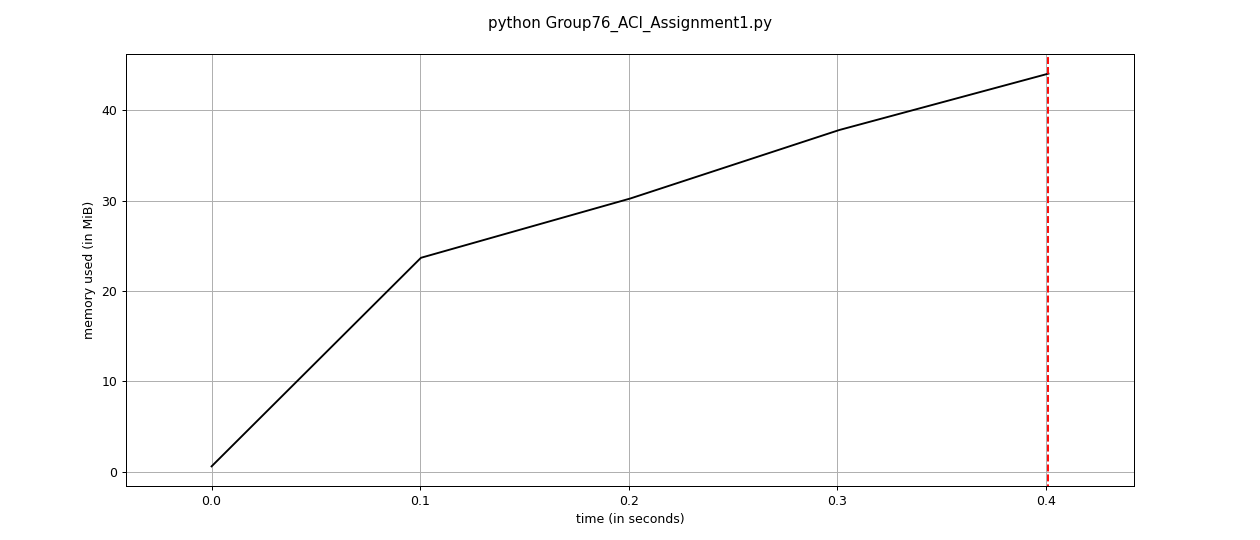

            Fig-1:Entry (4,1) and Exit (4,1)

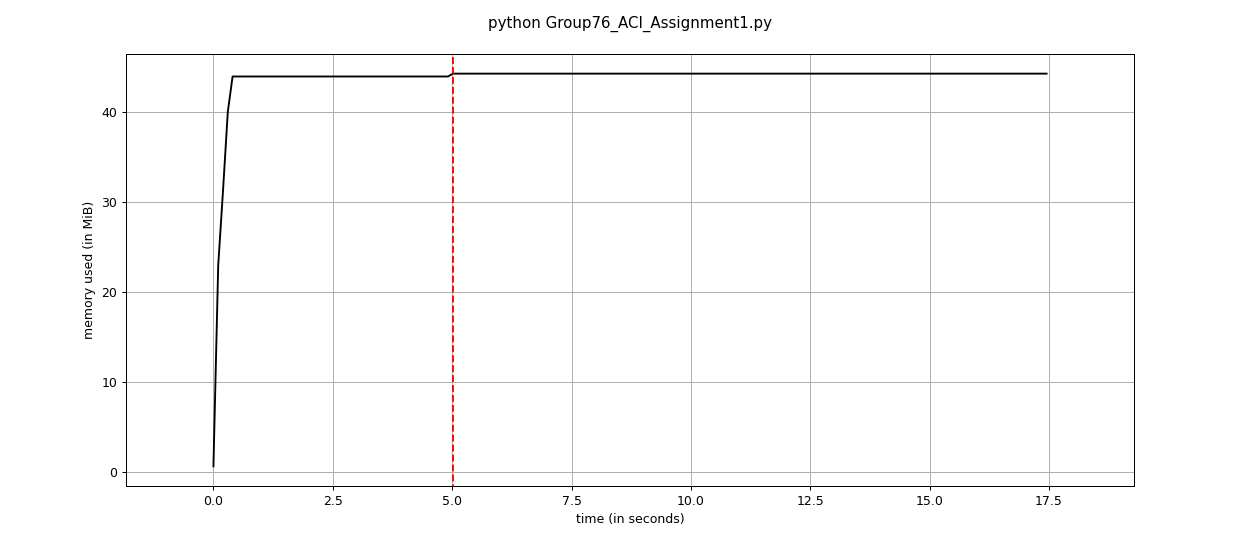

            Fig-2:Entry (4,1) and Exit (6,7)

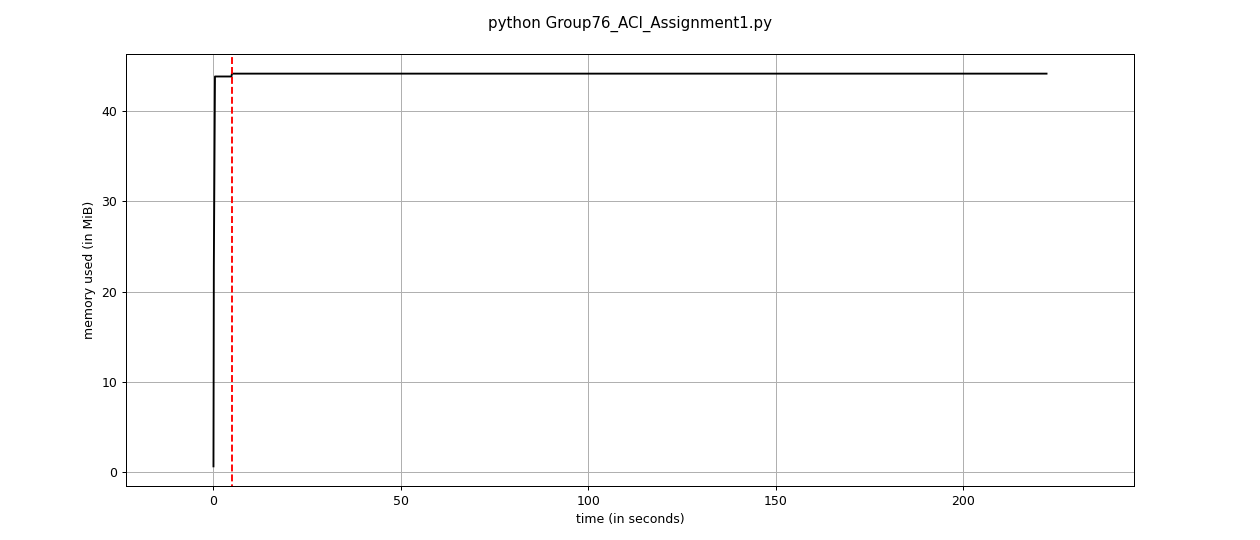

            Fig-3:Entry (4,1) and Exit (4,7)

### 6.	Provide your comparitive analysis or findings in no more than 3 lines in below section

Comparison : For the give problem statement, IDA* Algorithm performs better the Hill climbing Algorithm because of the following points: 
1. We are able to get the optimum path with cost for IDA*. 
2. Optimum path for Hill climbing algorithm can't be found for the given maze since its neighbour cell always have higher value as compared to the current cell value hence it will be stuck there and will not be able to move forwards towards the goal.
_______________________________________________________________________________________________________________________________